<a href="https://colab.research.google.com/github/Subin-pds/Supervised_ML_Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* ### Which variables are significant in predicting the price of a car
* ### How well those variables describe the price of a car
* ### Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# <b><u> Business Goal</u></b>
### We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [60]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df = pd.read_csv('/content/CarPrice_project.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [64]:
df.shape

(205, 26)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [66]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [67]:
len([df.duplicated()])

1

Exploratory Data Analysis

<Axes: xlabel='price', ylabel='Density'>

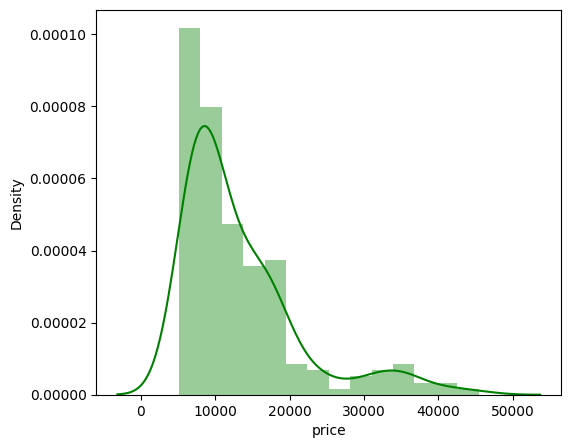

In [68]:
plt.figure(figsize=(6,5))
sns.distplot(df['price'],color='g')

<Axes: xlabel='price', ylabel='Density'>

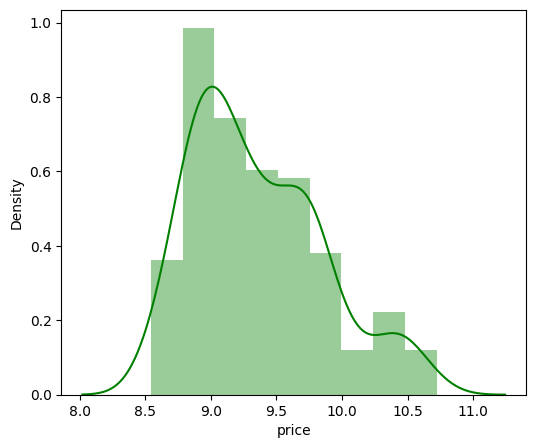

In [69]:
plt.figure(figsize=(6,5))
sns.distplot(np.log(df['price']),color='g')

In [70]:
numeric_features = df.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

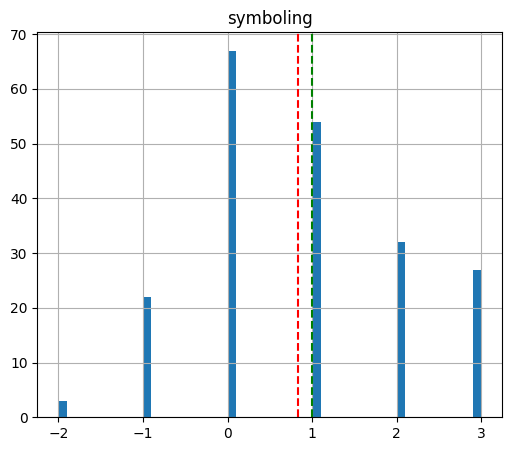

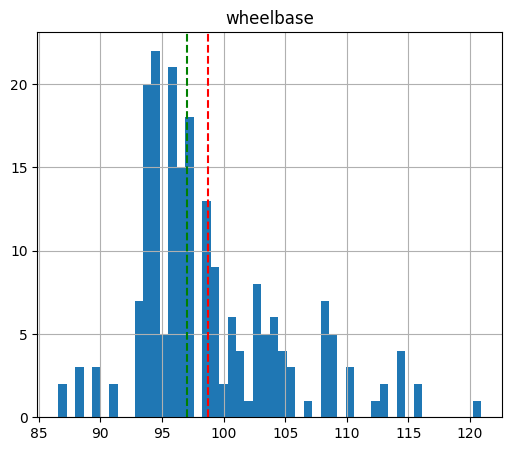

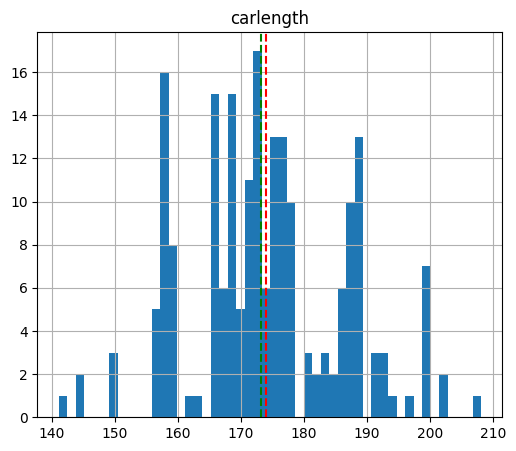

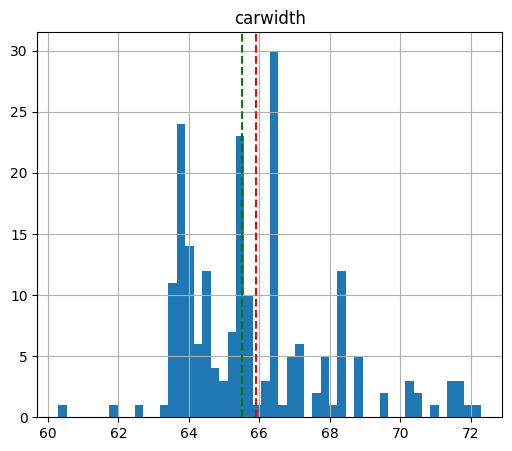

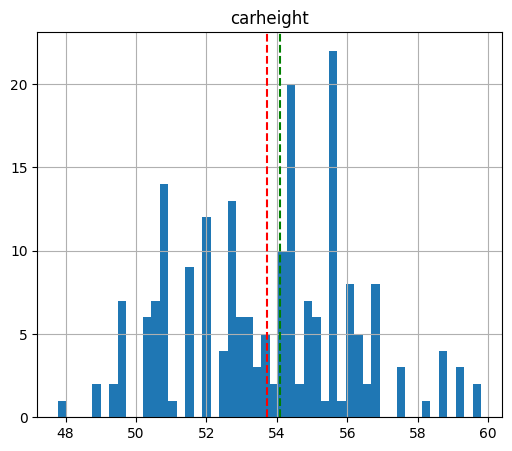

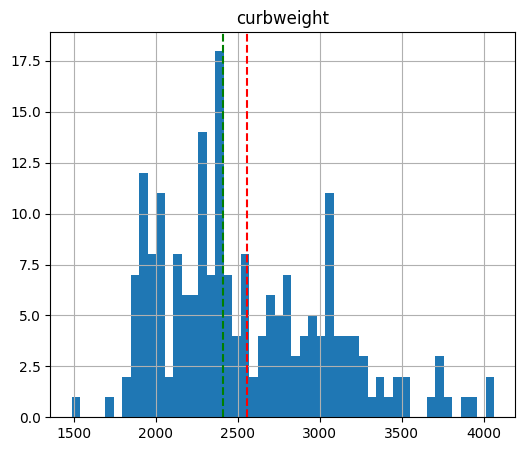

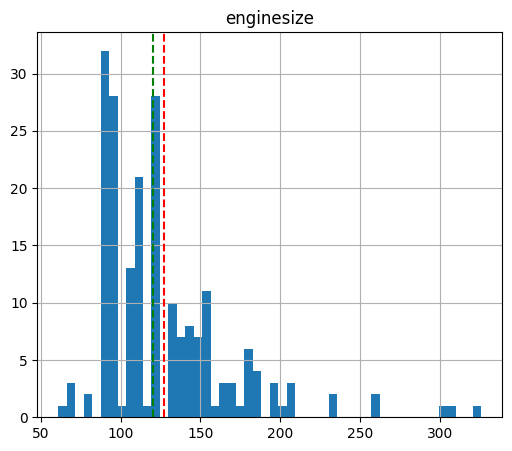

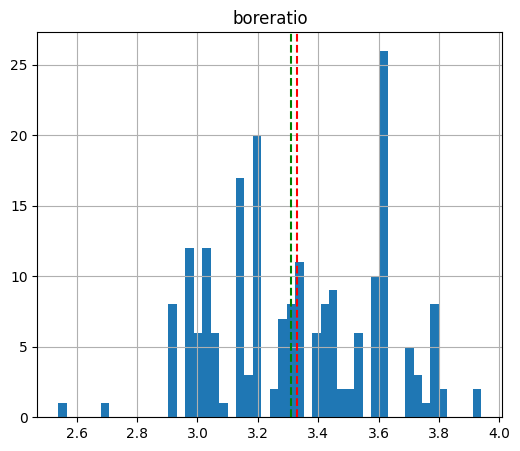

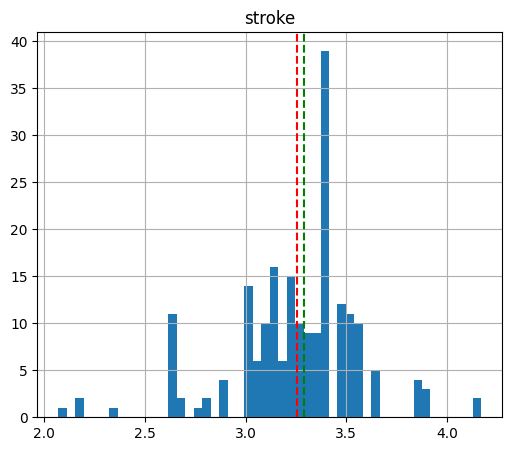

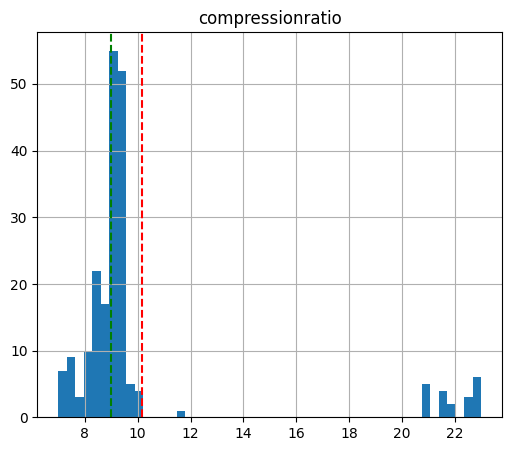

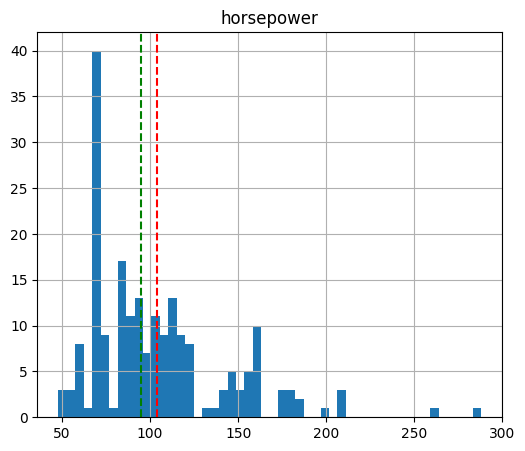

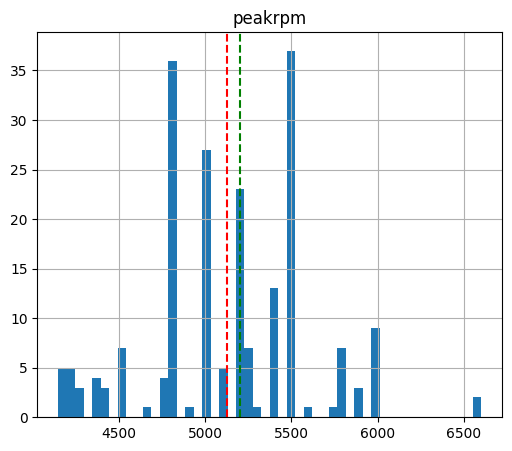

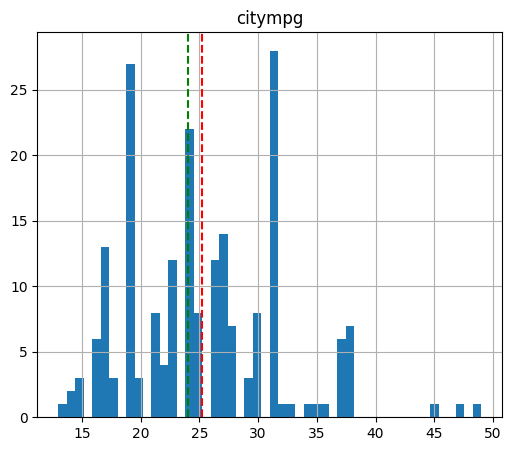

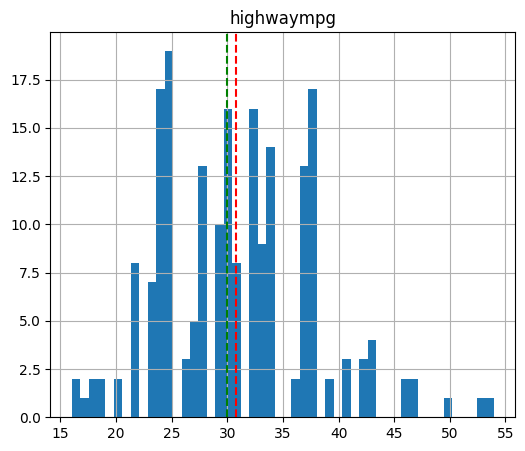

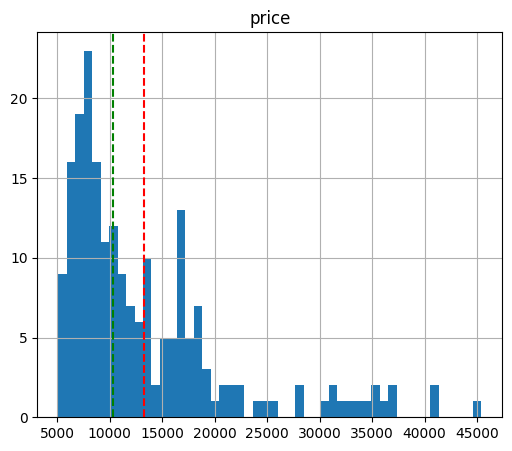

In [71]:
from matplotlib.lines import lineStyles
# Plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
  fig = plt.figure(figsize=(6,5))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color = 'red', linestyle='dashed')
  ax.axvline(feature.median(), color='green', linestyle='dashed')
  ax.set_title(col)
plt.show()

### Transformation
<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data

<b>Linearity and heteroscedasticity:</b>
First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values
If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

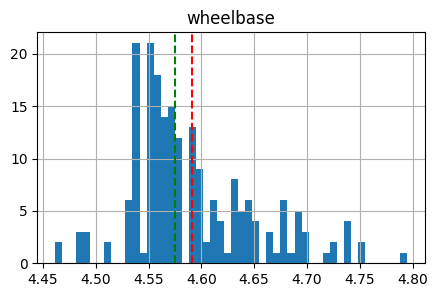

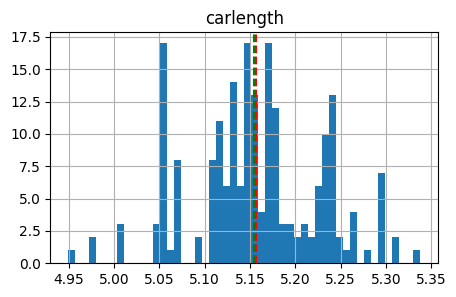

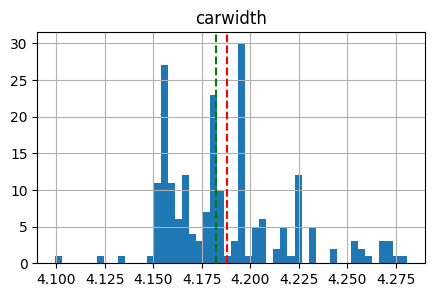

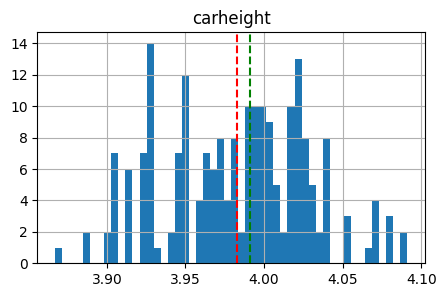

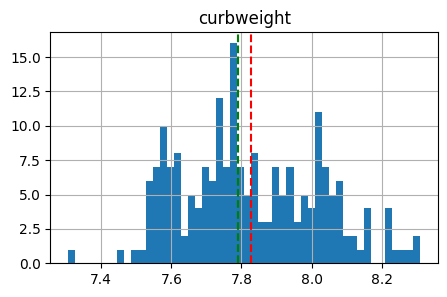

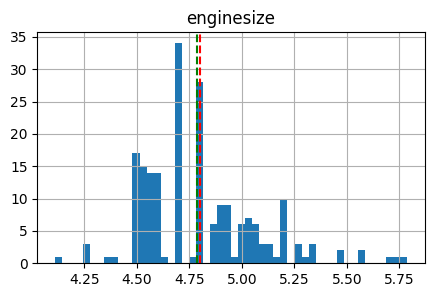

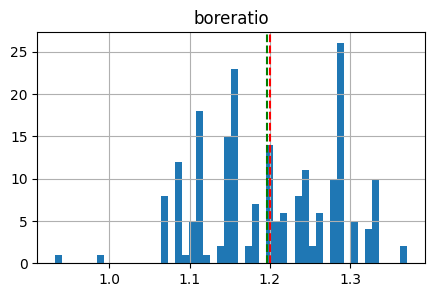

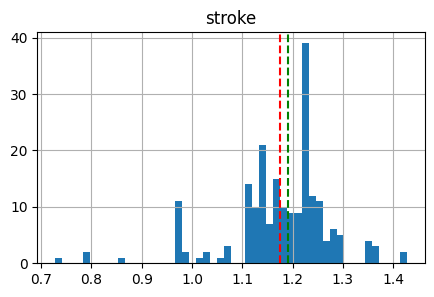

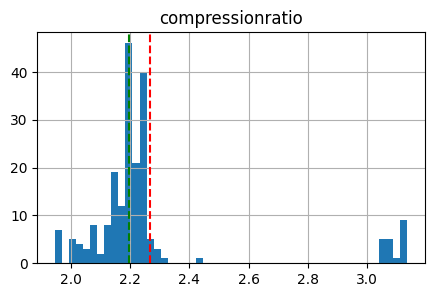

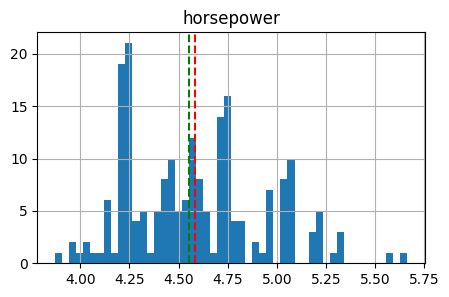

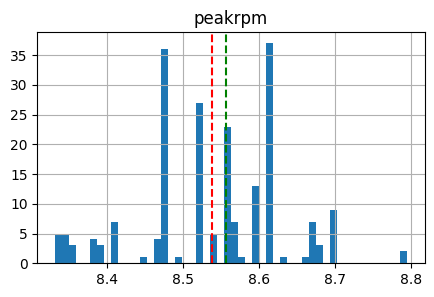

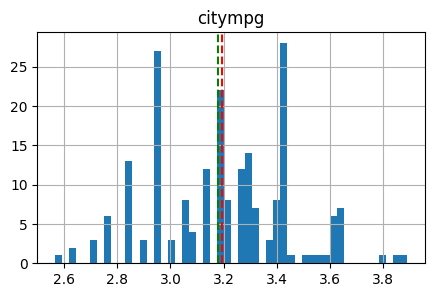

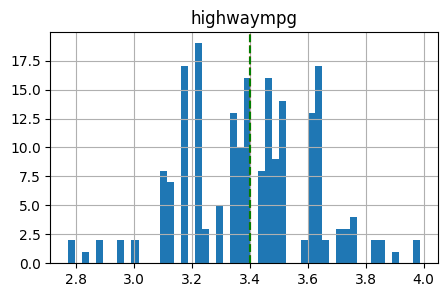

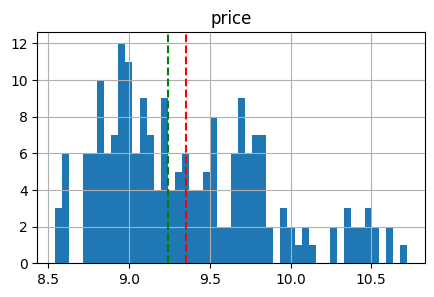

In [72]:
for col in numeric_features[2:]:
  fig = plt.figure(figsize=(5,3))
  ax = fig.gca()
  feature = np.log(df[col])
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color = 'red', linestyle='dashed')
  ax.axvline(feature.median(), color='green', linestyle='dashed')
  ax.set_title(col)
plt.show()

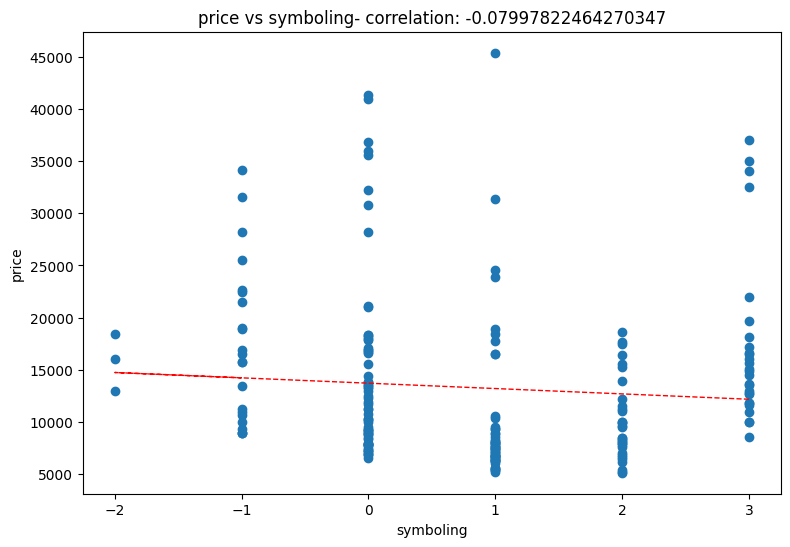

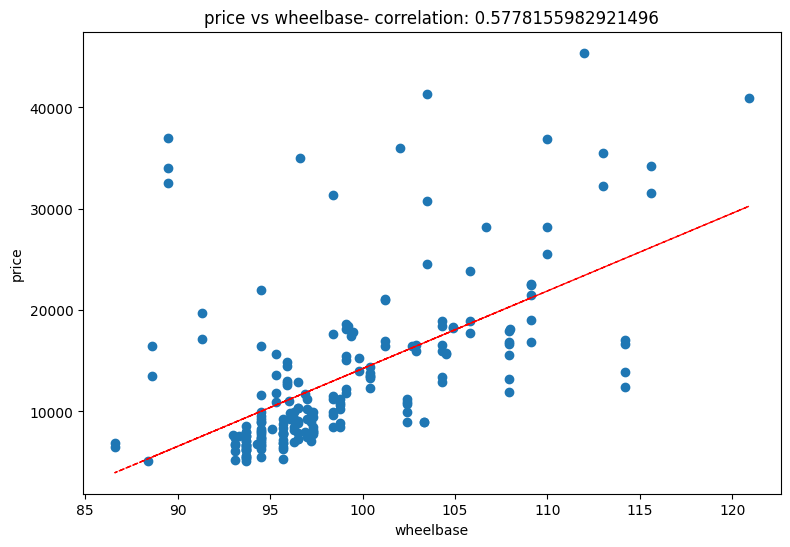

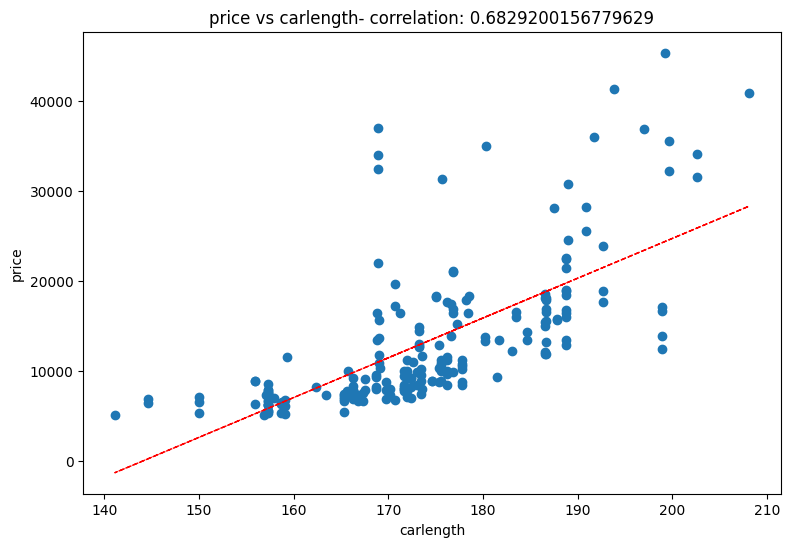

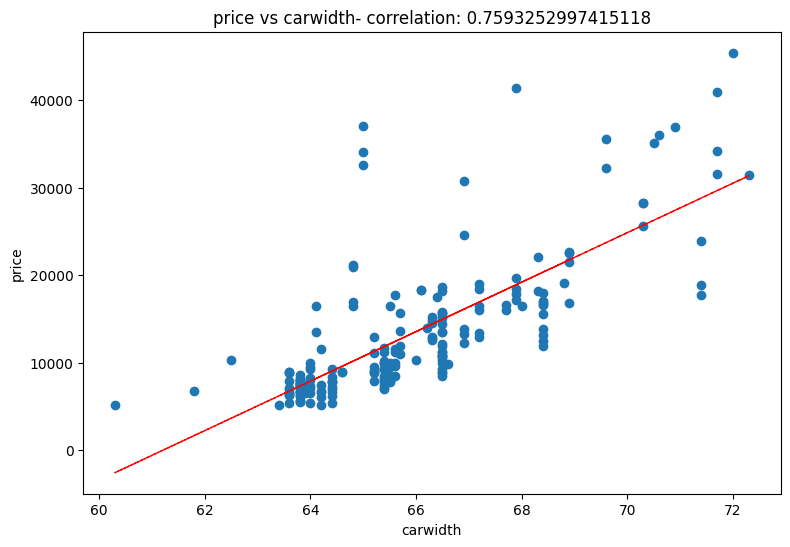

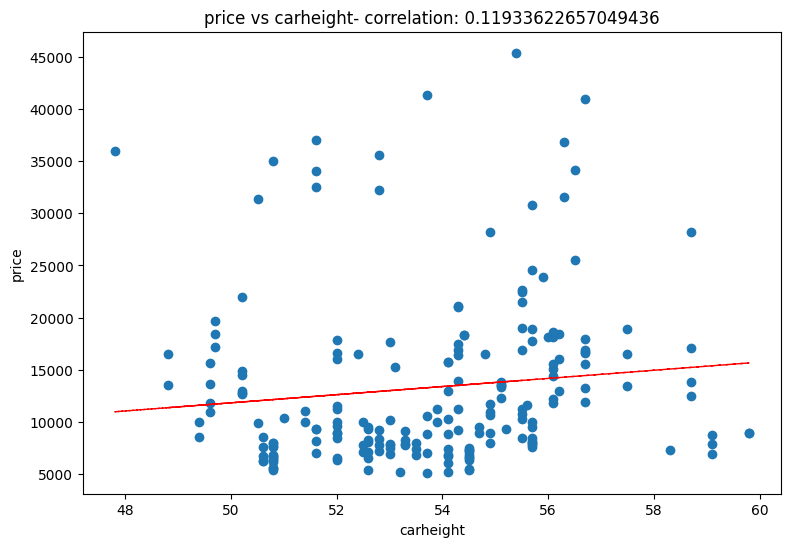

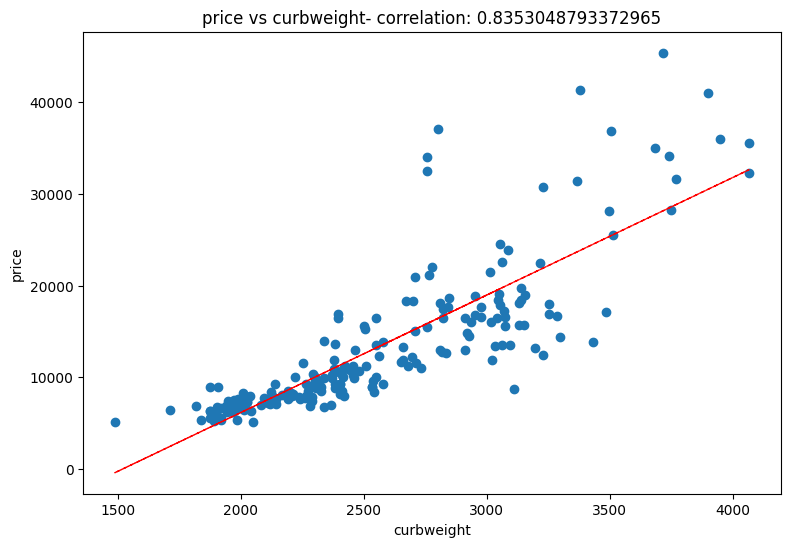

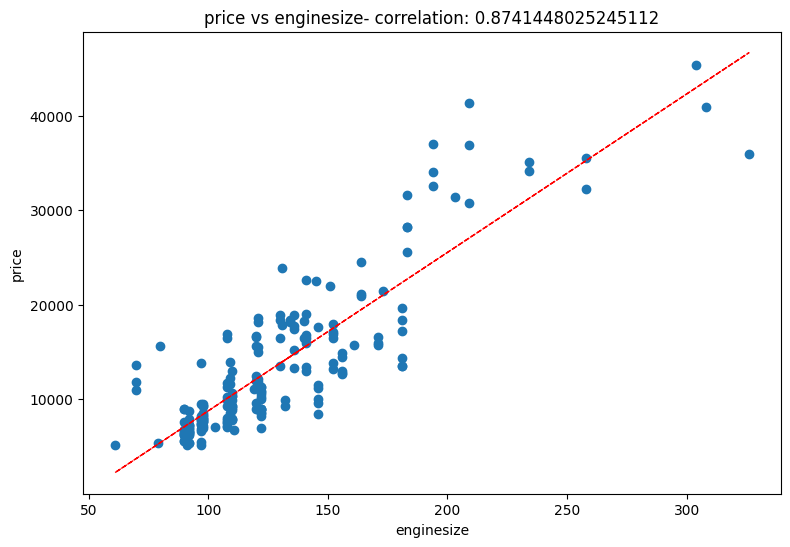

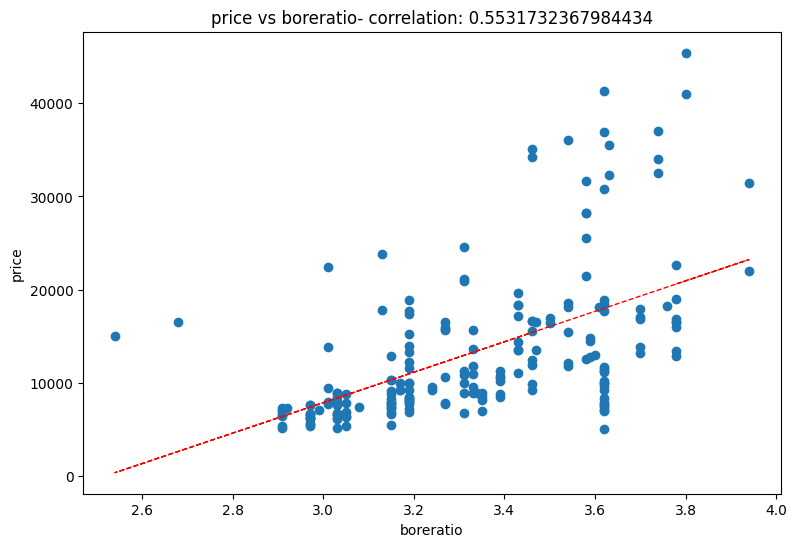

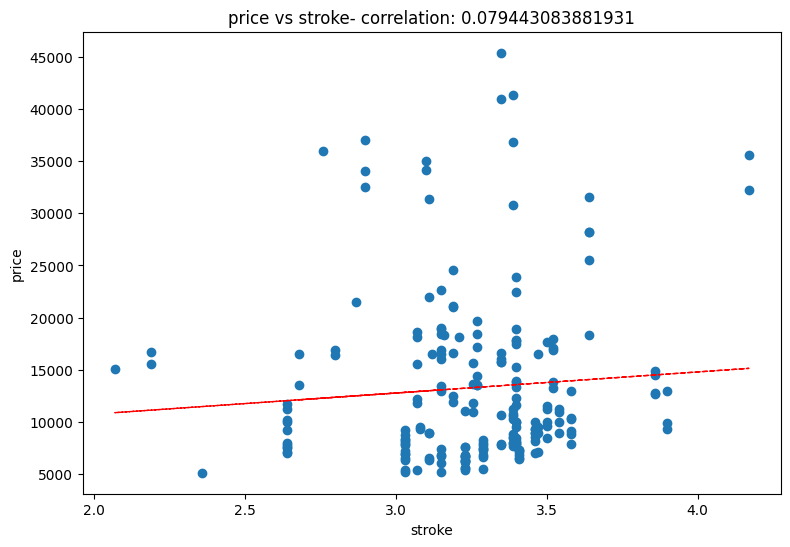

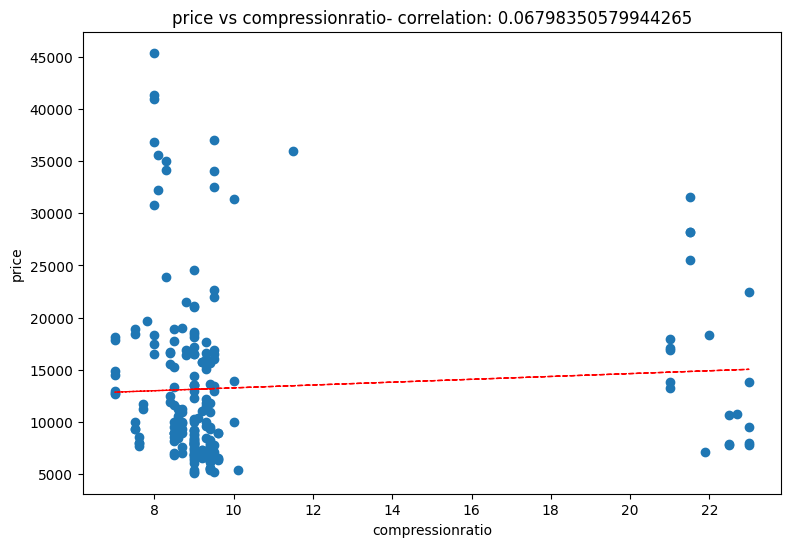

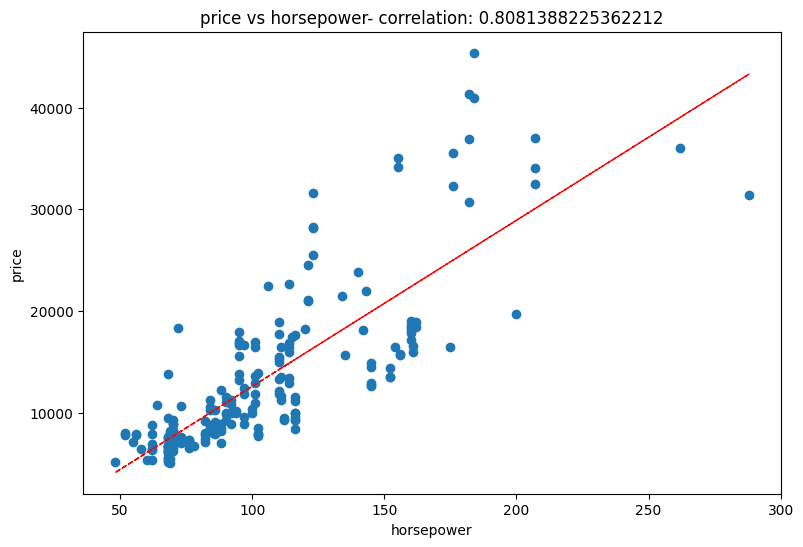

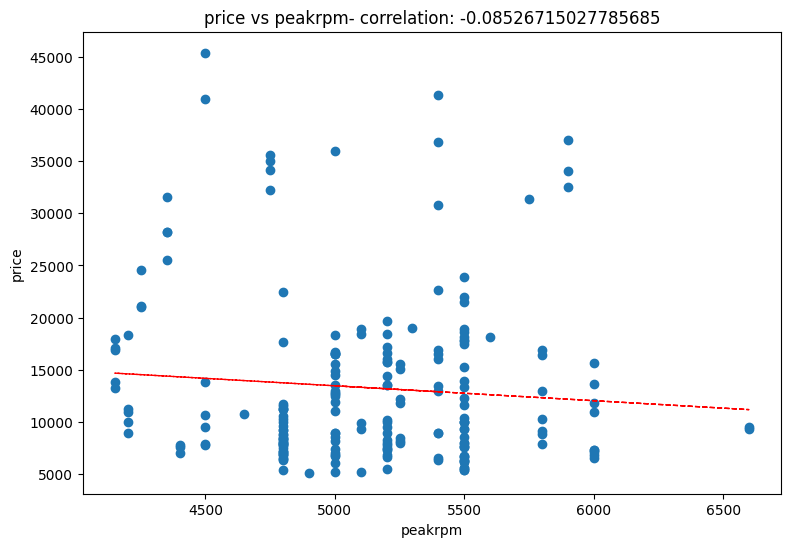

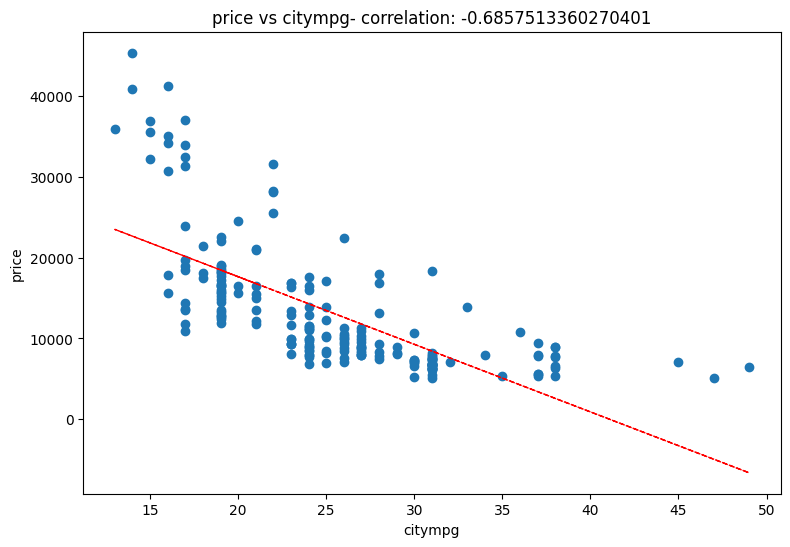

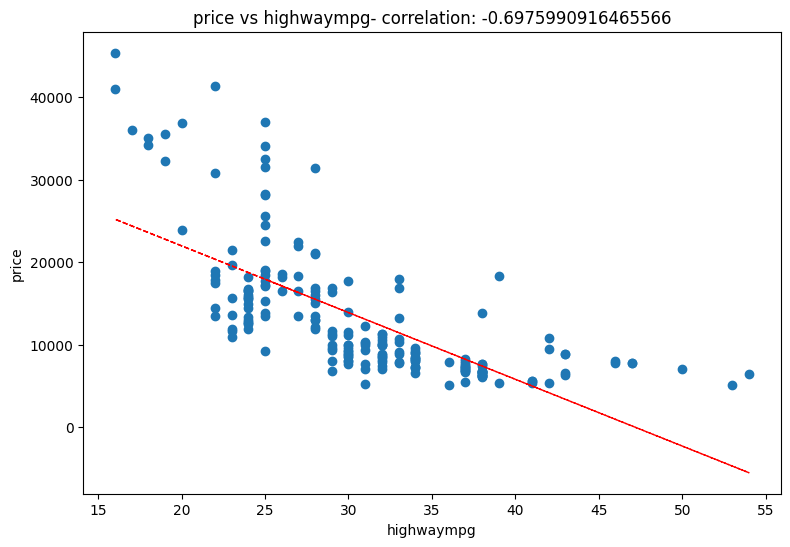

In [73]:
for col in numeric_features[1:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['price']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('price')
  ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['price'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col],y_hat, "r--", lw=1)

plt.show()


<Axes: >

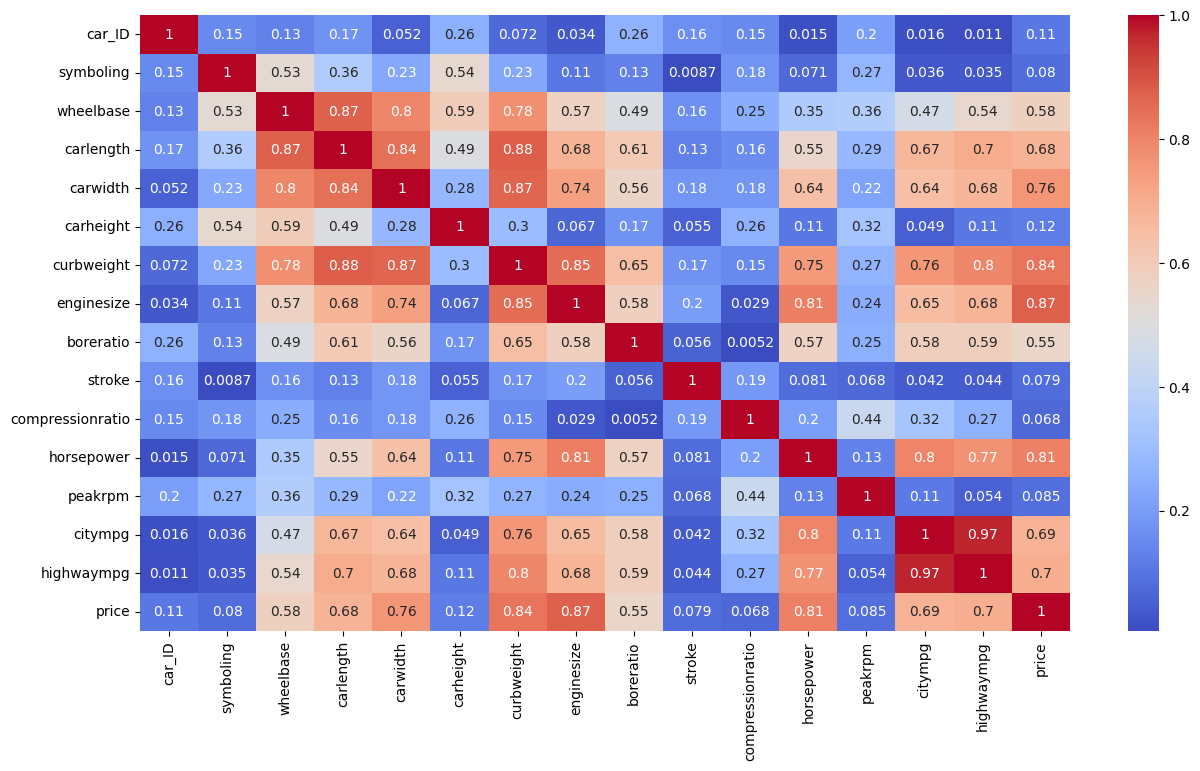

In [74]:
# Correlation
plt.figure(figsize = (15,8))
correlation = df[numeric_features].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [75]:
## Removing multicollinearity
df['mileage'] = 0.6*df['citympg'] + 0.4*df['highwaympg']
df['car_area'] = df['carwidth']*df['carlength']

In [76]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(x):
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return(vif)

In [77]:
calculate_vif(df[[i for i in df.describe().columns if i not in ['car_ID','price','carwidth','carlength','citympg','highwaympg','wheelbase','carheight','car_area','symboling','curbweight','boreratio','stroke','horsepower','peakrpm']]])

,variables,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,mileage,8.201171


In [78]:
numerical_features = ['enginesize', 'compressionratio', 'mileage']

In [79]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [80]:
df['company'] = df['CarName'].str.split(' ', expand = True)[0]
df['company'] = df['company'].replace({'toyouta':'Toyota', 'vw':'Volkswagen', 'vokswagen':'Volkswagen','maxda':'maxda', 'porcshce':'Porsche'})
df['company'] = df['company'].str.title()
df['company'].value_counts()

,count
company,
Toyota,32
Nissan,18
Mazda,15
Mitsubishi,13
Honda,13
Volkswagen,12
Subaru,12
Volvo,11
Peugeot,11


In [81]:
categorical_features = df.describe(include ={'object', 'category'}).columns

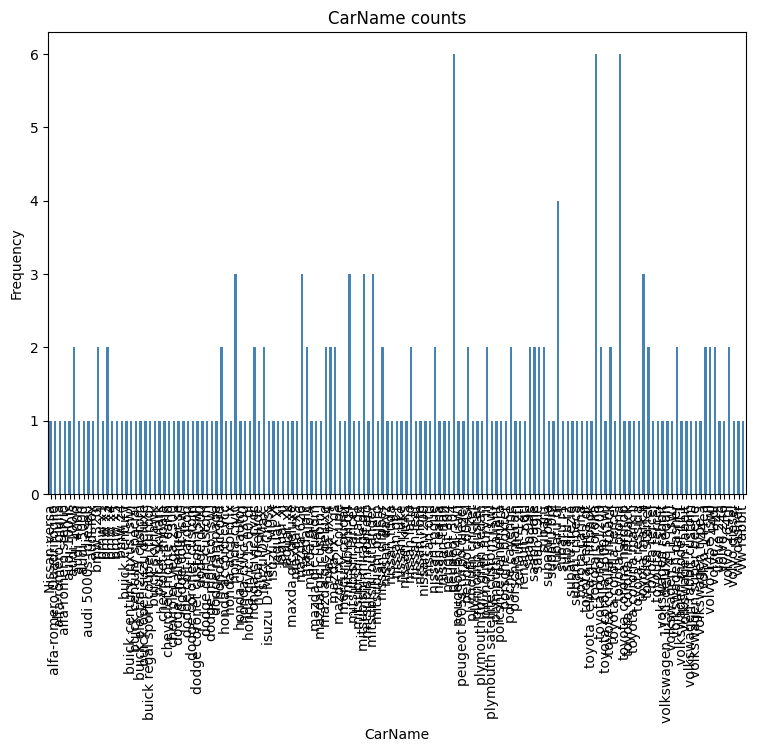

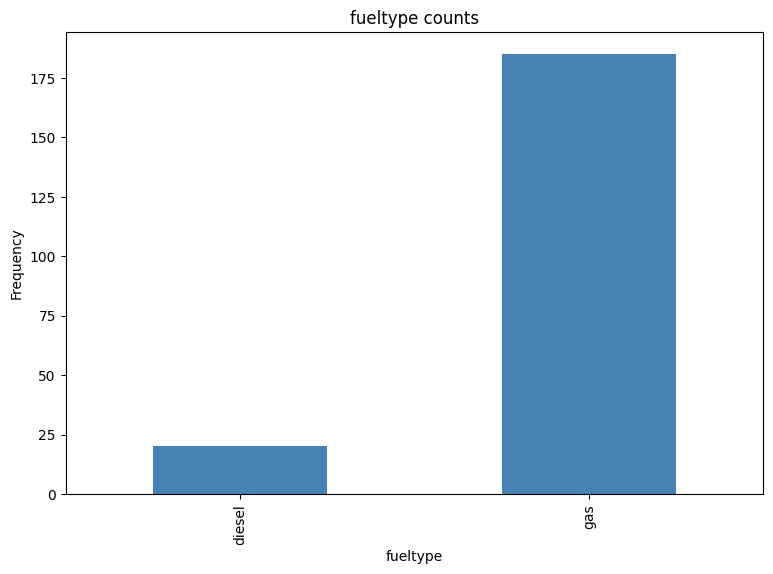

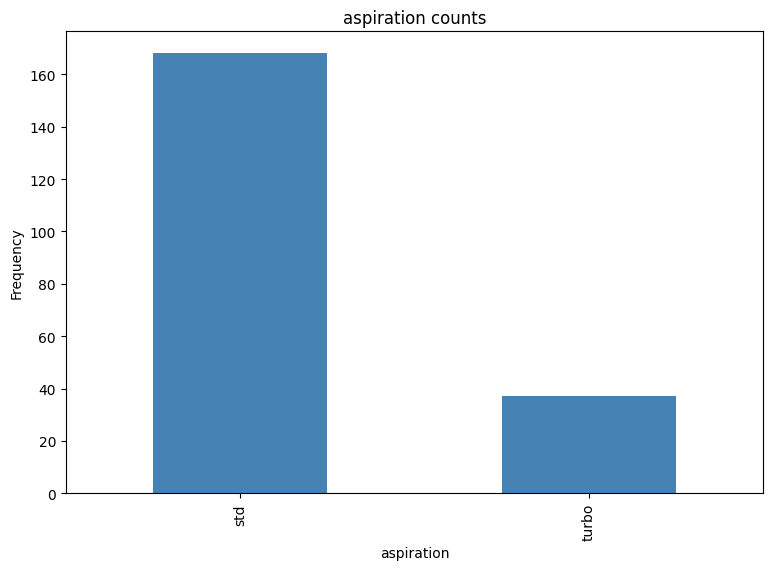

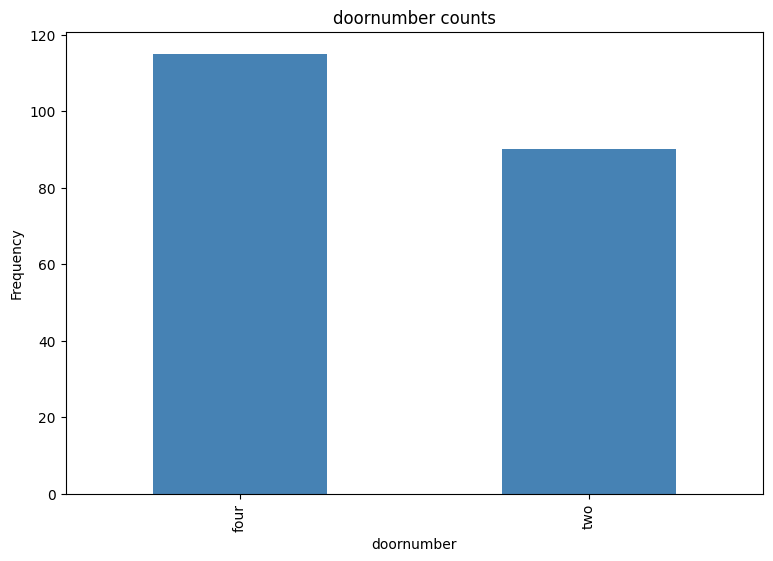

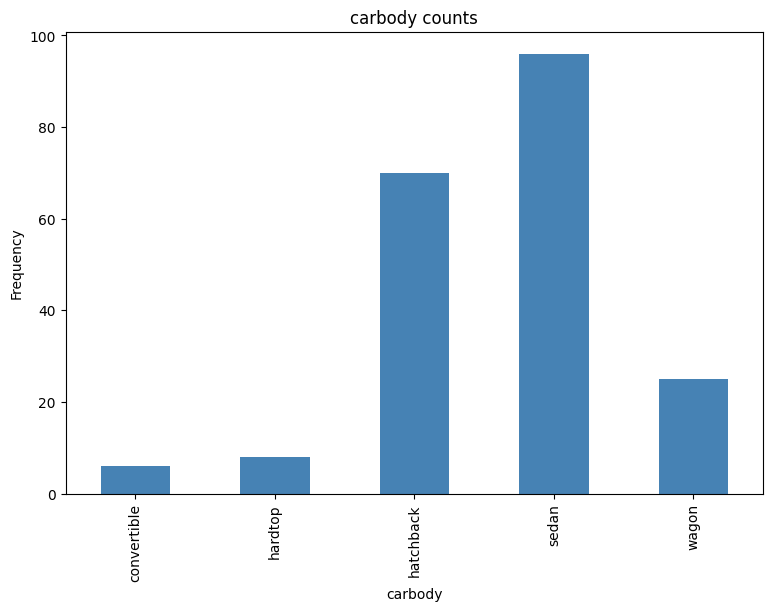

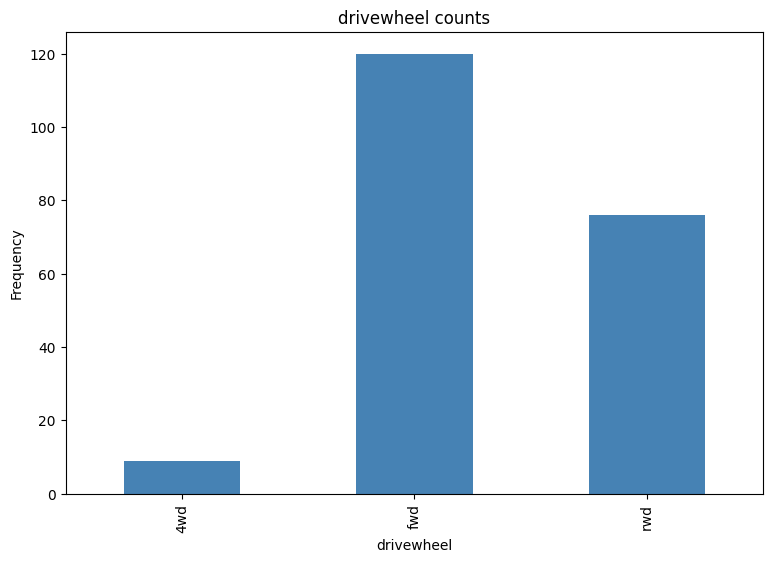

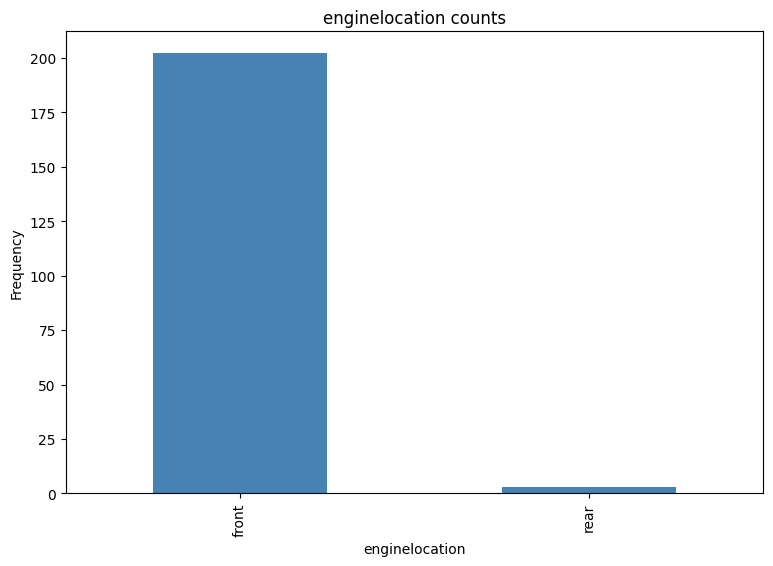

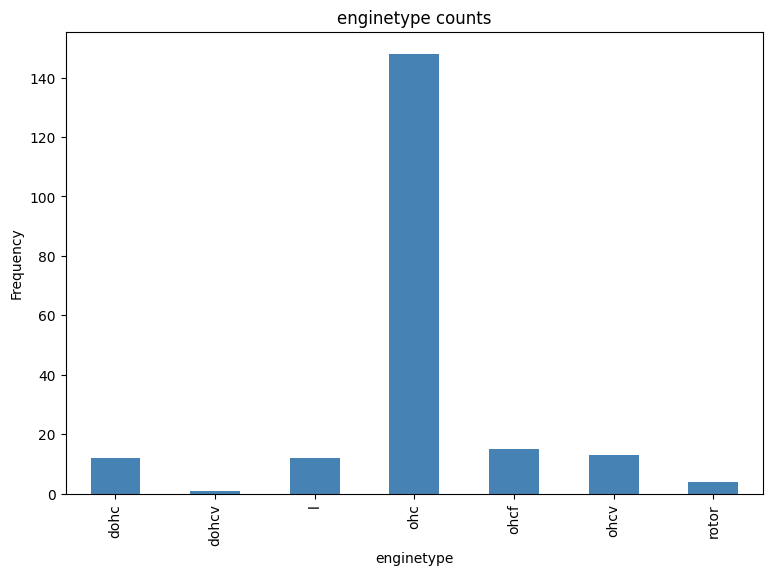

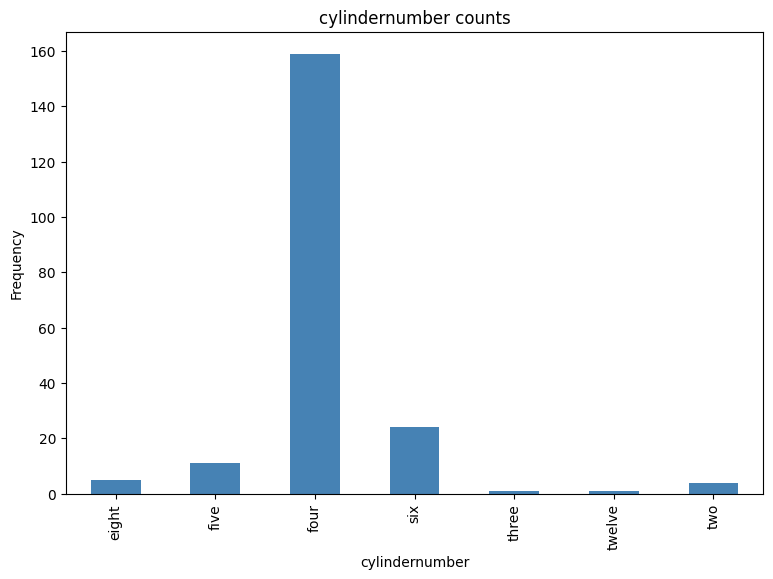

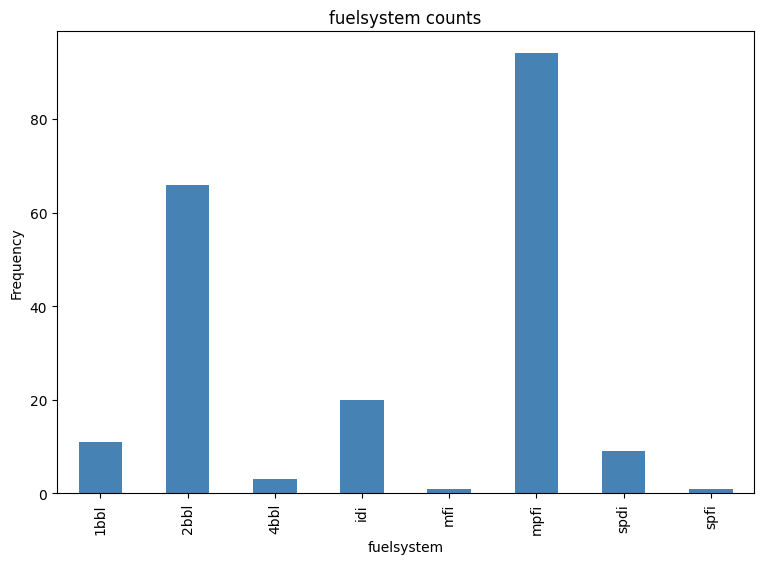

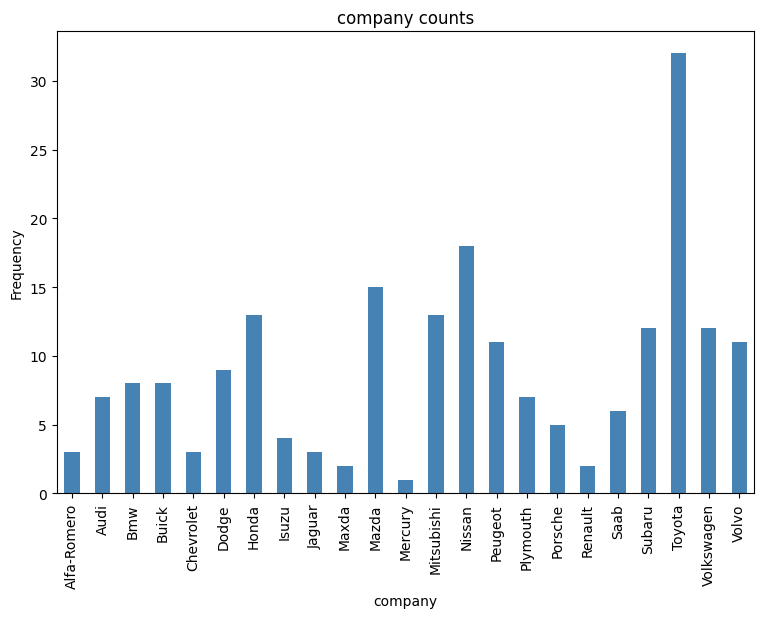

In [82]:
for col in categorical_features:
  counts = df[col].value_counts().sort_index()
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  counts.plot.bar(ax = ax, color = 'steelblue')
  ax.set_title(col + ' counts')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
plt.show()

In [83]:
df['fueltype'].value_counts()

,count
fueltype,
gas,185
diesel,20


In [84]:
df['enginelocation'].value_counts()

,count
enginelocation,
front,202
rear,3


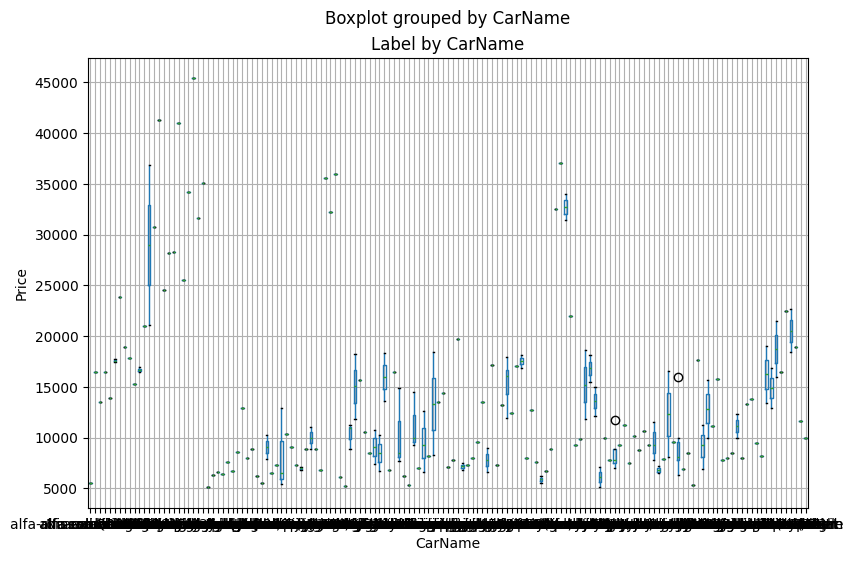

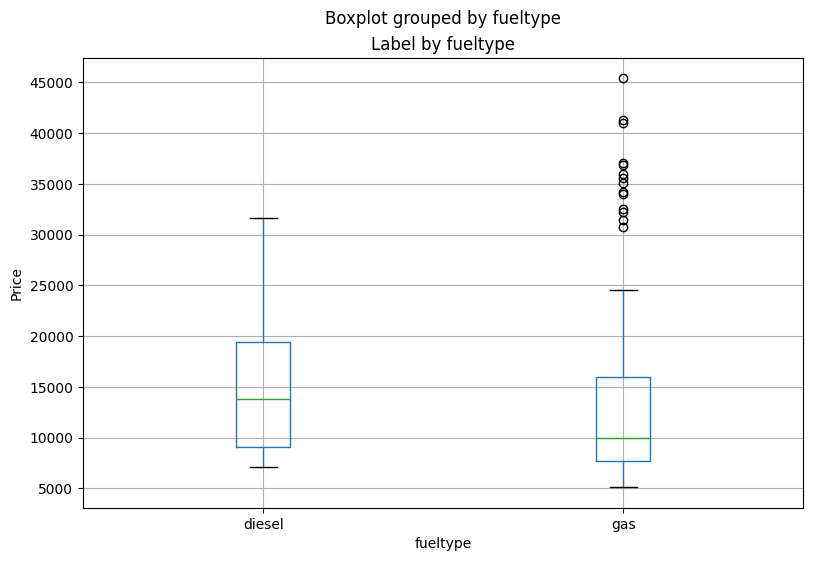

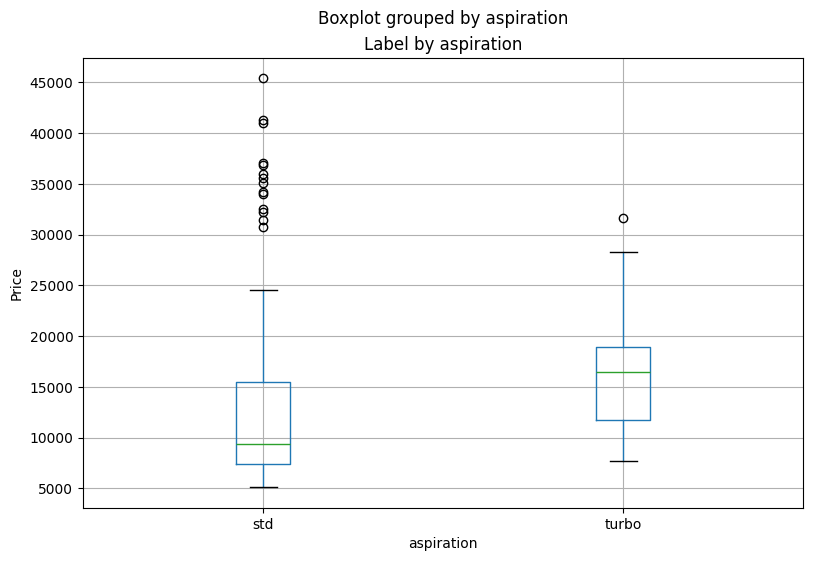

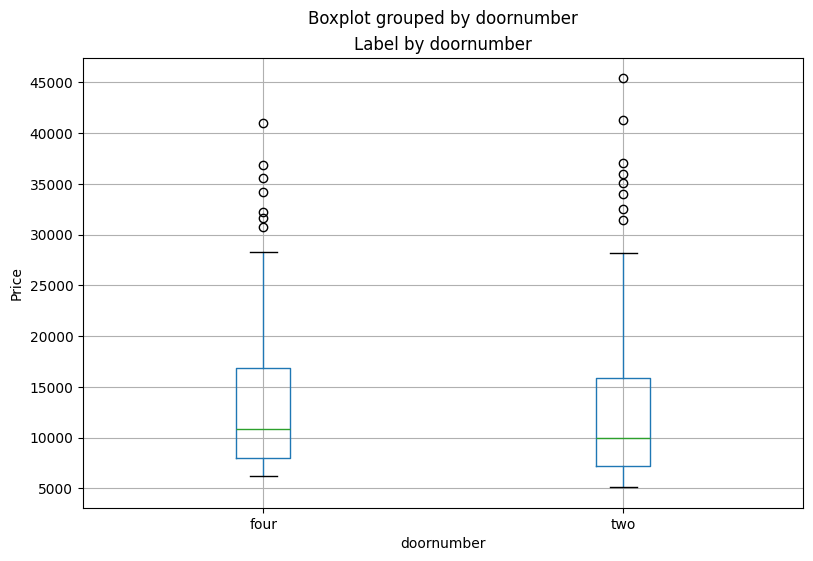

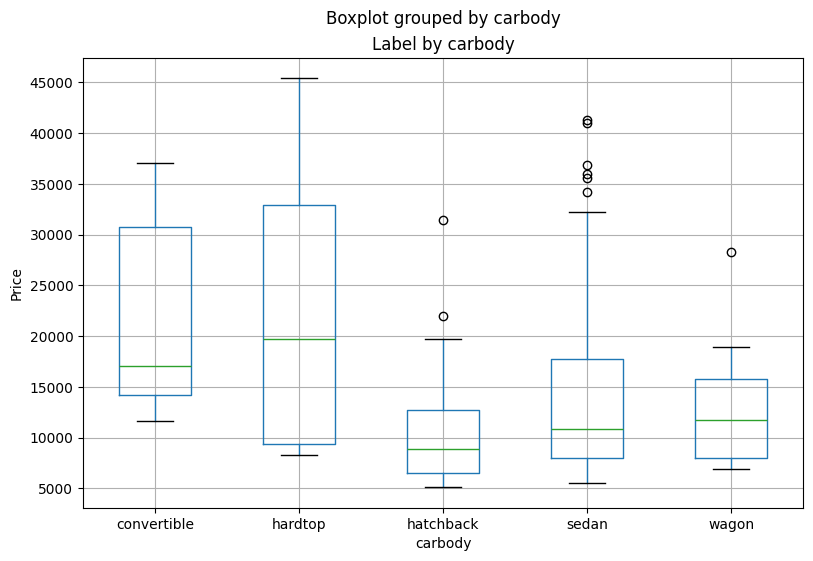

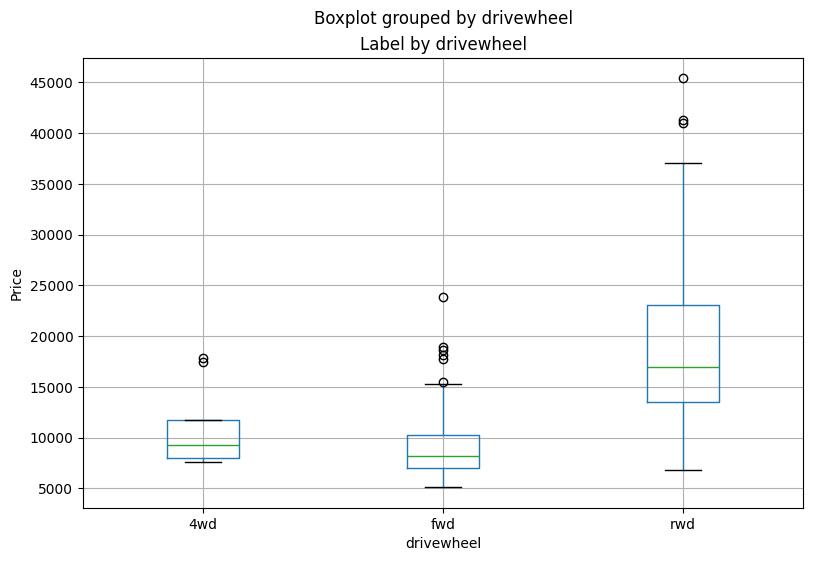

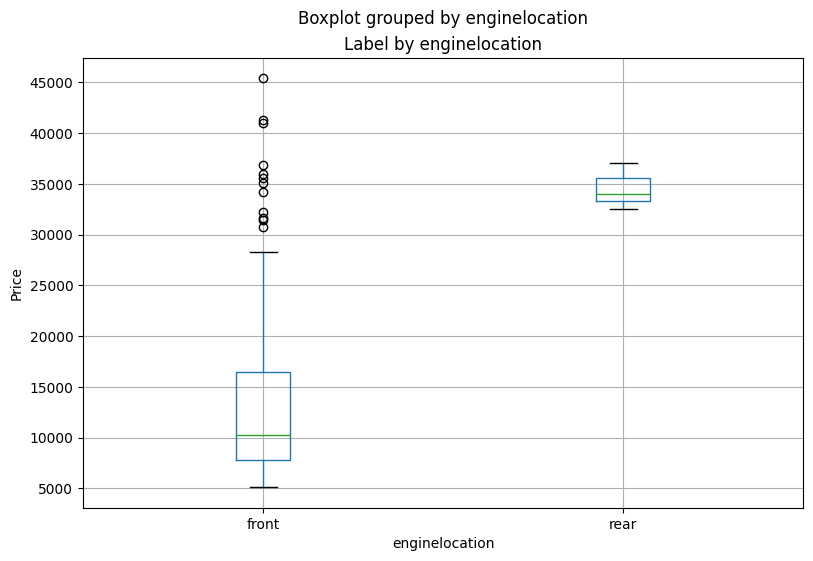

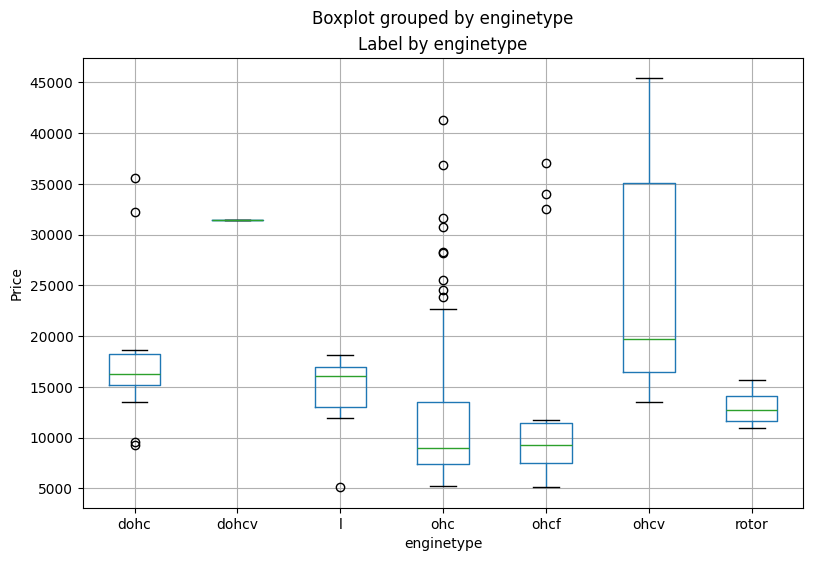

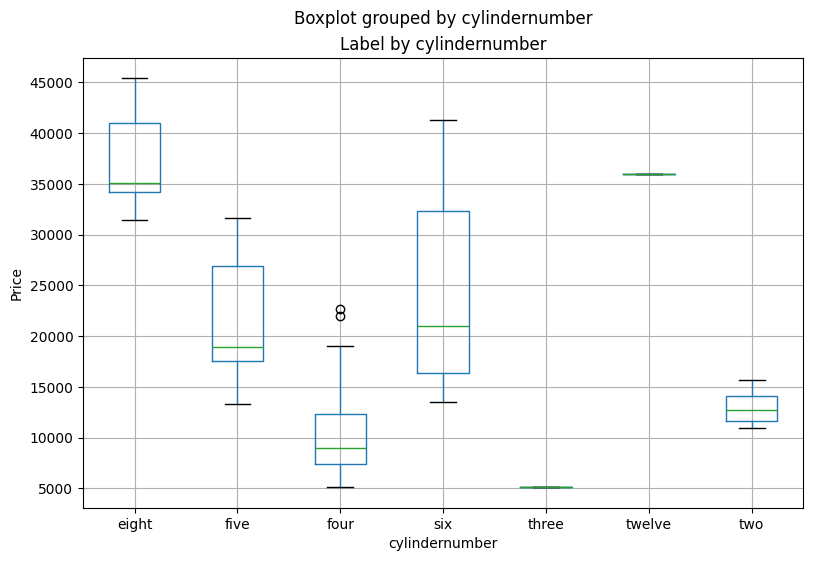

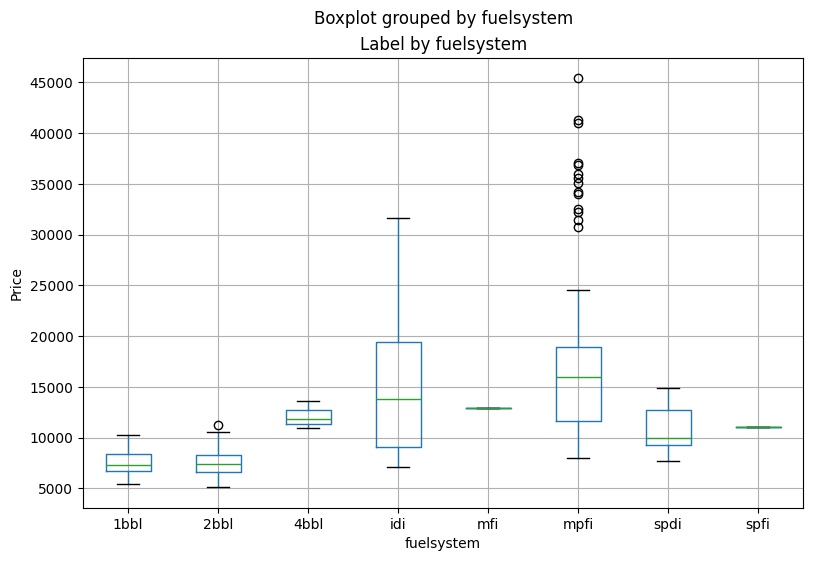

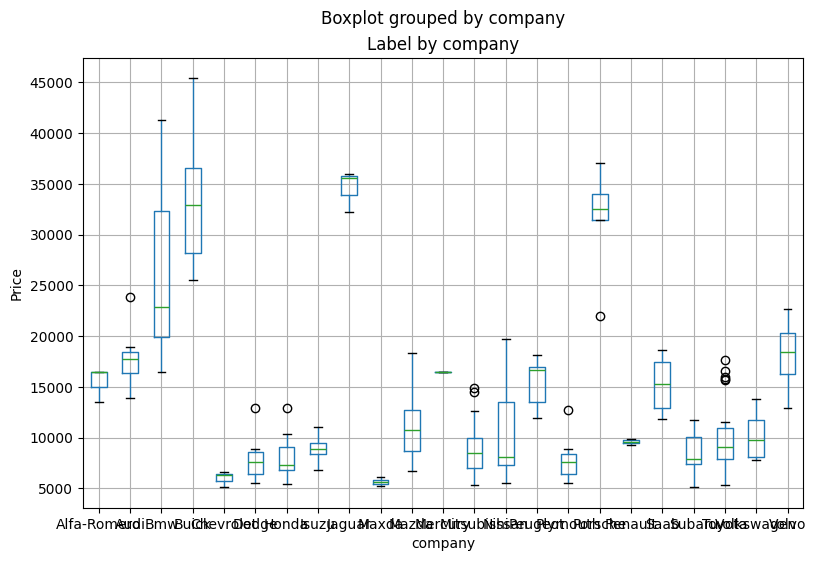

In [85]:
from matplotlib import figure
for col in categorical_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  df.boxplot(column='price', by=col, ax=ax)
  ax.set_title('Label by ' + col)
  ax.set_ylabel('Price')
plt.show()

<Figure size 2000x1000 with 0 Axes>

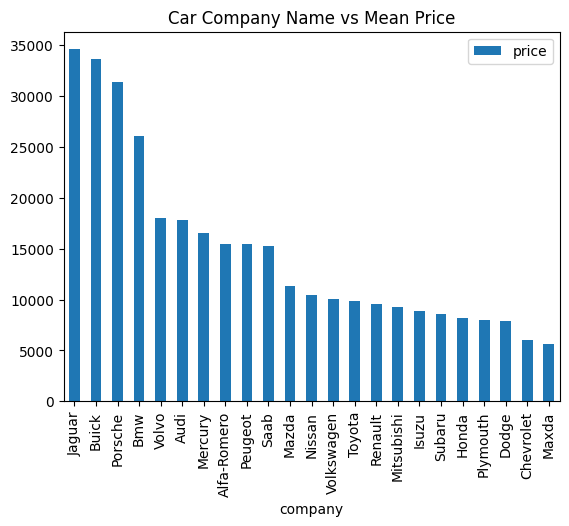

In [86]:
fig = plt.figure(figsize=(20,10))
df_car_vs_price = pd.DataFrame(df.groupby(['company'])['price'].mean().sort_values(ascending=False))
df_car_vs_price.plot.bar()
plt.title('Car Company Name vs Mean Price')
plt.show()

In [87]:
df_car_vs_price.head()

,price
company,
Jaguar,34600.000000
Buick,33647.000000
Porsche,31400.500000
Bmw,26118.750000
Volvo,18063.181818


In [88]:
df_car_vs_price.rename(columns={'price':'Price Mean'}, inplace=True)

In [89]:
# Merging the 'df_car_vs_Price' dataset with the original dataset 'df'
df =  df.merge(df_car_vs_price, on='company', how = 'left')

In [90]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,Price Mean
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500,24,30,13950.0,26.4,11690.92,Audi,17859.166714
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500,18,22,17450.0,19.6,11726.24,Audi,17859.166714


In [91]:
df['company_cat'] = df['Price Mean'].apply(lambda x: 0 if x<12000 else(1 if 12000 <= x < 24000 else 2 ))

In [92]:
df[['Price Mean', 'company_cat']]

,Price Mean,company_cat
0,15498.333333,1
1,15498.333333,1
2,15498.333333,1
3,17859.166714,1
4,17859.166714,1
...,...,...
200,18063.181818,1
201,18063.181818,1
202,18063.181818,1
203,18063.181818,1


In [93]:
correlation.price

,price
car_ID,-0.109093
symboling,-0.079978
wheelbase,0.577816
carlength,0.682920
carwidth,0.759325
carheight,0.119336
curbweight,0.835305
enginesize,0.874145
boreratio,0.553173
stroke,0.079443


Data Preparation

In [94]:
df.shape

(205, 31)

In [95]:
# Creating a copy of the dataset
df_pr = df.copy()

In [96]:
# Checking the newly created copied 'df_pr'
df_pr.shape

(205, 31)

In [97]:
# Checking the fuelsystem categorical counts
df.fuelsystem.value_counts()

,count
fuelsystem,
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


In [98]:
df.describe(include ={'object', 'category'}).columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

In [99]:
# Checking the unique values in the columns to refer for Label encoding (Not necessary)
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [100]:
# Label encoding

encodings = {
              'fueltype':{'diesel':1, 'gas':0},
              'aspiration':{'turbo':1, 'std':0},
              'doornumber':{'four':4, 'two':2},
              'drivewheel':{'fwd':0, '4wd':0, 'rwd':1},
              'cylindernumber': {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
}

# Apply the label encoding
df_pr = df_pr.replace(encodings)
# Display the encoded columns along with their original values for verification
print("Original and Encoded Columns (first 5 rows):")
display(df_pr[['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'cylindernumber']].head())

Original and Encoded Columns (first 5 rows):


,fueltype,aspiration,doornumber,drivewheel,cylindernumber
0,0,0,2,1,4
1,0,0,2,1,4
2,0,0,2,1,6
3,0,0,4,0,4
4,0,0,4,0,5


In [101]:
df_pr = pd.get_dummies(df_pr, columns=['carbody',"enginetype","fuelsystem"], prefix=['body', 'etype', 'fsystem'])

In [102]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,Price Mean,company_cat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950.0,26.4,11690.92,Audi,17859.166714,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450.0,19.6,11726.24,Audi,17859.166714,1


In [103]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [104]:
df_pr.shape

(205, 48)

In [105]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

In [106]:
from scipy.stats import zscore

X = df_pr[features].apply(zscore)

In [107]:
y = np.log10(df_pr['price'])
y

,price
0,4.130173
1,4.217484
2,4.217484
3,4.144574
4,4.241795
...,...
200,4.226471
201,4.279781
202,4.332135
203,4.351603


In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train)

In [110]:
# Checking the Regression score
reg.score(X_train,y_train)

0.9324420504983304

In [111]:
# Checking the coefficients
reg.coef_

array([ 0.07683825,  0.01590146, -0.05608906,  0.00149697,  0.02135358,
        0.01543893,  0.01238109,  0.00031735,  0.06565892,  0.01437322,
        0.0005336 , -0.00028112,  0.00042538, -0.00796079, -0.04125975,
       -0.05110849, -0.0658886 , -0.03672994, -0.04472375, -0.00052948,
       -0.01768536,  0.00149697,  0.01790728, -0.00753211])

In [112]:
# Creating a prediction with the X_test data
y_prediction = reg.predict(X_test)

MSE:  8981848.585185597
RMSE:  2996.9732373155416


In [125]:
# Now Based on the prediction value and the original data we are comparing them to understand how accurate the created model is

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(10**(y_test), 10**(y_prediction))

RMSE = np.sqrt(MSE)

R2 = r2_score(10**(y_test), 10**(y_prediction))

print('MSE: ', MSE)
print('RMSE: ', RMSE)
print("R2 :" ,R2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_prediction)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE:  8981848.585185597
RMSE:  2996.9732373155416
R2 : 0.8839799650687881
Adjusted R2 :  0.7099499126719702


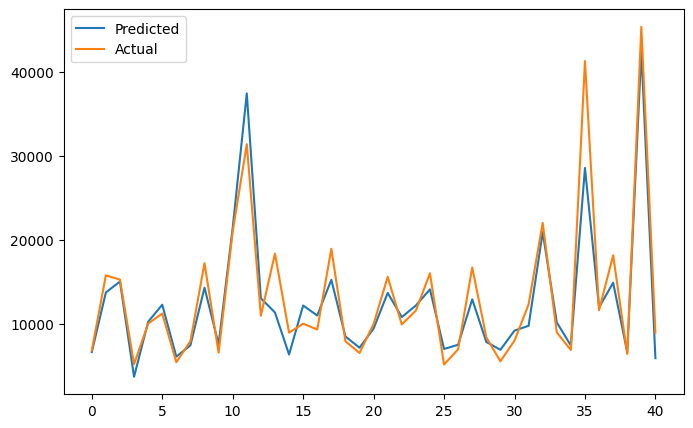

In [127]:
# Plotting the the Predicted vs Actual
plt.figure(figsize=(8,5))
plt.plot(10**(y_prediction))
plt.plot(np.array(10**(y_test)))
plt.legend(['Predicted', 'Actual'])
plt.show()


Lasso Regression

In [128]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, max_iter=3000)

lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [131]:
lasso.score(X_train,y_train)

0.5843799787551645

In [135]:
# Finding the prediction value
y_pred_1 = lasso.predict(X_test)

In [134]:
lasso.score(X_test,y_test)

0.5538492740351153

In [142]:
# Model Evaluation

MSE  = mean_squared_error(10**(y_test), 10**(y_pred_1))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_1))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_1)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 41045022.19389814
RMSE : 6406.638915523345
R2 : 0.46981460848239964
Adjusted R2 :  -0.32546347879400095


In [147]:
# Cross Validation and Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = { 'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [148]:
# Checking the best parameters
lasso_regressor.best_params_

{'alpha': 0.001}

In [152]:
print('The best value of the parmater alpha is: ',lasso_regressor.best_params_['alpha'] )
print(f'Using the {lasso_regressor.best_params_['alpha']}, the value of negative mean squared error is: {lasso_regressor.best_score_}')

The best value of the parmater alpha is:  0.001
Using the 0.001, the value of negative mean squared error is: -0.005057074346555317


In [153]:
y_predict_lasso = lasso_regressor.predict(X_test)

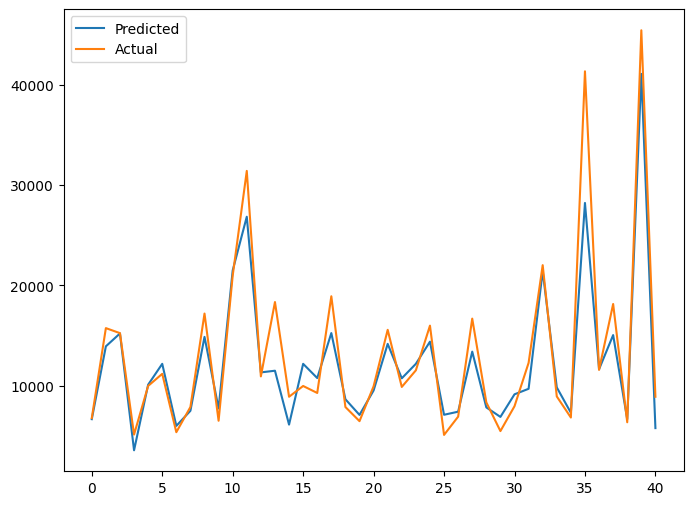

In [155]:
# Plotting the Predicted vs Actual
plt.figure(figsize=(8,6))
plt.plot(10**(y_predict_lasso))
plt.plot(np.array(10**(y_test)))
plt.legend(['Predicted','Actual'])
plt.show()

In [156]:
# Model Evaluation

MSE  = mean_squared_error(10**(y_test), 10**(y_predict_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_predict_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_predict_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8630691.066403879
RMSE : 2937.8037828289143
R2 : 0.8885159252566063
Adjusted R2 :  0.7212898131415157


Ridge Regression

In [157]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01)

ridge.fit(X_train,y_train)


Ridge(alpha=0.01)

In [158]:
ridge.score(X_train,y_train)

0.9324419977396488

In [159]:
y_pred_r = ridge.predict(X_test)

In [160]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8968083.946945962
RMSE : 2994.675933543722
R2 : 0.8841577651947011
Adjusted R2 :  0.7103944129867528


In [161]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [163]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_['alpha'])
print("\nUsing ",ridge_regressor.best_params_['alpha'], " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : 5

Using  5  the negative mean squared error is:  -0.005204770442303097


In [164]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [165]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8476786.746703872
RMSE : 2911.4921855817975
R2 : 0.8905039330011489
Adjusted R2 :  0.7262598325028724


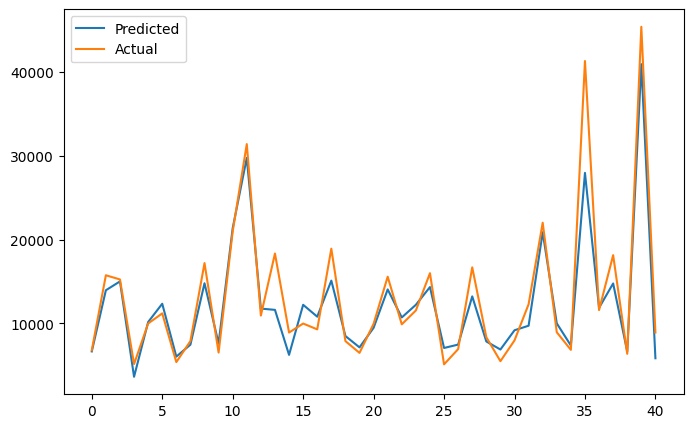

In [166]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Elastic Net Regression

In [167]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=.01, l1_ratio=0.5)

In [168]:
elastic_net.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [169]:
elastic_net.score(X_train,y_train)

0.9201258103690421

In [171]:
y_pred_en = elastic_net.predict(X_test)

In [172]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8338799.785389021
RMSE : 2887.698007996858
R2 : 0.8922863335749246
Adjusted R2 :  0.7307158339373114


In [175]:
# Hyper Parameter Tuning
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [176]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [180]:
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)



Using  {'alpha': 0.01, 'l1_ratio': 0.5}  the negative mean squared error is:  -0.004799769352225591


In [181]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8338799.785389021
RMSE : 2887.698007996858
R2 : 0.8922863335749246
Adjusted R2 :  0.7307158339373114


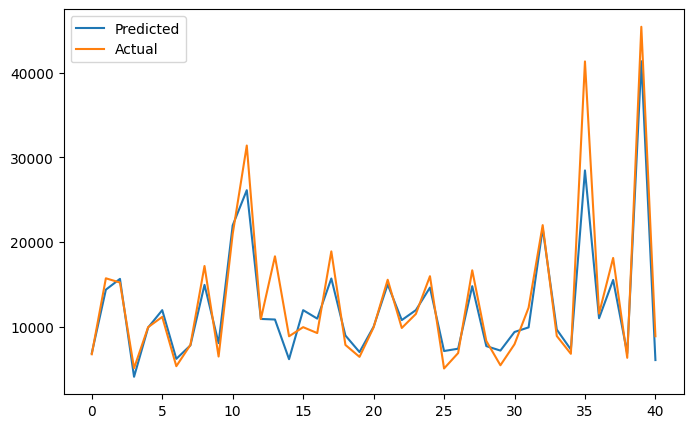

In [182]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

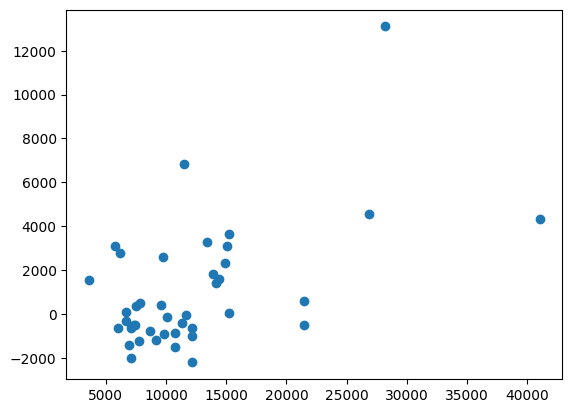

In [184]:
### Heteroscadacity
plt.scatter(10**(y_predict_lasso),10**(y_test)-10**(y_predict_lasso))